In [1]:
#Core
import io
from copy import copy
from collections import OrderedDict
import requests
import csv

#Data science
import numpy as np
import scipy

#Visualization 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from hypyp.ext.mpl3d import glm
from hypyp.ext.mpl3d.mesh import Mesh
from hypyp.ext.mpl3d.camera import Camera

#MNE
import mne

#HyPyp
from hypyp import prep 
from hypyp import analyses
from hypyp import stats
from hypyp import viz

#Data Loading
import pyxdf

import sys
sys.path.append('..')

from utils.csv_utils import *
from utils.lsl_utils import *


In [2]:
path='/Users/jonasmago/PhD_code/GT church/Josh at GT LSL/libet_same_device.xdf'
#path='/Users/jonasmago/PhD_code/GT church/Josh at GT LSL/libet_same_device_with_speech.xdf'
#path='/Users/jonasmago/PhD_code/GT church/Josh at GT LSL/libet_two_devices.xdf'
eeg = LSL_to_MNE(path, verbose = False)

Stream_n 0 is channel ['BBT-E32-AAB044_EEG_0']
Stream_n 1 is channel ['BBT-E32-AAB044_ExG_B_1']
Stream_n 2 is channel ['BBT-E32-AAB044_IMU_B_2']
Stream_n 3 is channel ['BBT-E32-AAB044_DIN_4']
Stream_n 4 is channel ['BBT-E32-AAB044_FOT_3']


In [7]:
eeg_channel = 0
event_channel = 3

In [22]:
eeg=LSL_to_MNE(path, verbose = False, stream_n = eeg_channel)

events_raw=LSL_to_MNE(path, verbose = False, stream_n = event_channel)

# The curernt event channel is a button box with 3 buttons
# We need to select the right button 
# And convert each button press into a single event
events = events_raw.time_series[:,2]
events = (events[1:]-events[:-1])
events [events<=0] = 0
events = np.insert(events,0,0)

selected stream is ['BBT-E32-AAB044_EEG_0']
mean step size is 0.0039099999999999985
variance of step size is 3.009265538105056e-36
average sampling rate is 255.7544757033249
assigned sampling rate is 256.0
selected stream is ['BBT-E32-AAB044_DIN_4']
mean step size is 0.0039099999999999985
variance of step size is 3.009265538105056e-36
average sampling rate is 255.7544757033249
assigned sampling rate is 256.0


In [23]:
eeg.make_raw(verbose = False)

Creating RawArray with float64 data, n_channels=32, n_times=46216
    Range : 0 ... 46215 =      0.000 ...   180.527 secs
Ready.


In [24]:
info = mne.create_info(['STI'], eeg.raw.info['sfreq'], ['stim'])
stim_raw = mne.io.RawArray(np.expand_dims(events,axis=0), info)
eeg.raw.add_channels([stim_raw], force_update_info=True)
events = mne.find_events(eeg.raw)
event_dict = {'button': 1}

Creating RawArray with float64 data, n_channels=1, n_times=46216
    Range : 0 ... 46215 =      0.000 ...   180.527 secs
Ready.
25 events found
Event IDs: [1]


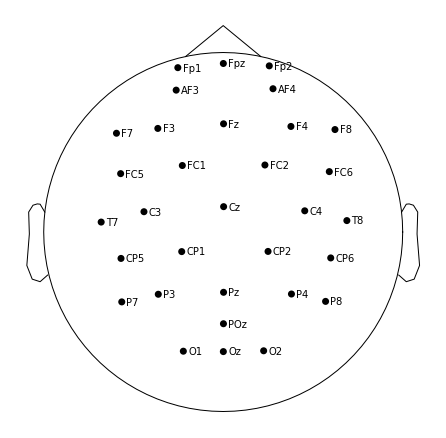

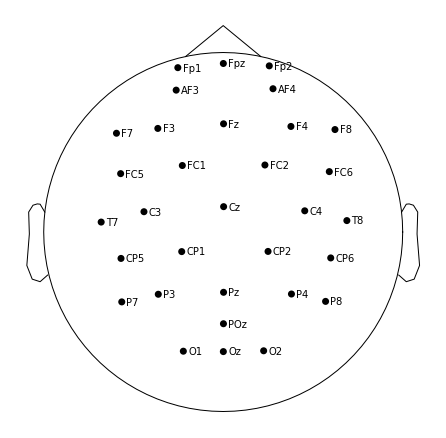

In [25]:
eeg.raw.plot_sensors(show_names=True)

In [26]:
epochs = mne.Epochs(eeg.raw, events, event_id=event_dict, tmin=-1.0, tmax=1.0,
                    preload=True)
# fig = epochs.plot(events=events)

Not setting metadata
Not setting metadata
25 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 25 events and 513 original time points ...
0 bad epochs dropped


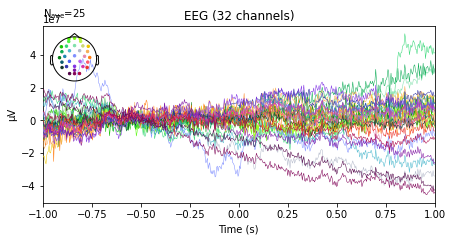

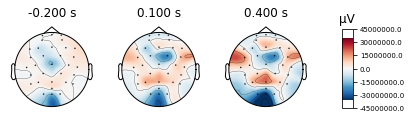

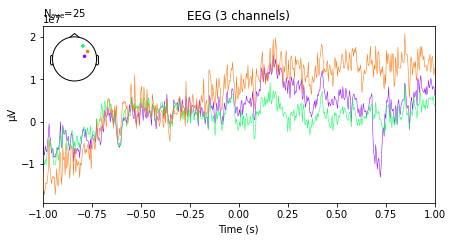

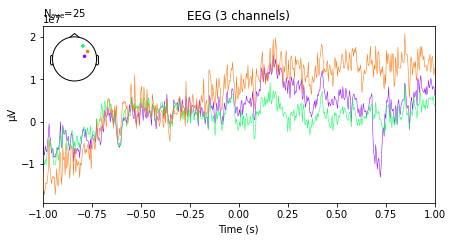

In [27]:
evoked = epochs['button'].average()
evoked.plot(spatial_colors=True)
evoked.plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05)
evoked.plot(picks=('C4','F4','FC6'), spatial_colors=True)